<a href="https://colab.research.google.com/github/MYElmasry/KNN-and-Weighted-KNN./blob/main/kNN_%26_weighted_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from collections import Counter

In [184]:
iris = load_iris()
X = iris.data 
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle = True)

In [185]:
df = pd.DataFrame(data=X_train, columns=iris.feature_names)
df['target'] = y_train
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,4.9,3.1,1.5,0.1,0
1,6.1,2.8,4.0,1.3,1
2,5.9,3.0,4.2,1.5,1
3,7.3,2.9,6.3,1.8,2
4,5.0,2.3,3.3,1.0,1


In [147]:
def euclidean_distance(a, b):
    distance = 0
    for d in range(len(a)):
        distance += (a[d]-b[d])**2
    distance = distance ** 0.5
    return distance

In [132]:
def manhattan_distance(a, b):
  distance = 0
  for i in range(len(a)):
    distance += abs(a[i]-b[i])
  return distance

# **KNN**

In [186]:
def knn_predict(X_train, X_test, y_train, y_test, k):
    y_hat_test_euclidean = []
    y_hat_test_manhattan = []

    for test_point in X_test:
        distances = []
        for train_point in X_train:
            distance = euclidean_distance(test_point, train_point)
            distances.append(distance)
        df_dists = pd.DataFrame(data=distances, columns=['dist'], index=df.target.index)
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]
        counter = Counter(y_train[df_nn.index])
        prediction = counter.most_common()[0][0]
        y_hat_test_euclidean.append(prediction)

        distances = []
        for train_point in X_train:
            distance = manhattan_distance(test_point, train_point)
            distances.append(distance)
        df_dists = pd.DataFrame(data=distances, columns=['dist'], index=df.target.index)
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]
        counter = Counter(y_train[df_nn.index])
        prediction = counter.most_common()[0][0]
        y_hat_test_manhattan.append(prediction)
    return y_hat_test_euclidean, y_hat_test_manhattan

# Make predictions on test dataset
y_hat_test_euclidean, y_hat_test_manhattan= knn_predict(X_train, X_test, y_train, y_test, k=5)

print(y_hat_test_euclidean)
print(y_hat_test_manhattan)

[2, 0, 2, 2, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 1, 0, 2, 2, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 1, 2, 1, 0]
[2, 0, 2, 2, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 1, 0, 1, 2, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 1, 2, 1, 0]


In [187]:
print(accuracy_score(y_test, y_hat_test_euclidean))
print(accuracy_score(y_test, y_hat_test_manhattan))

1.0
0.9736842105263158


    Eculidean  Manhattan
1    0.973684   0.947368
2    0.973684   0.947368
3    1.000000   1.000000
4    1.000000   0.947368
5    1.000000   0.973684
..        ...        ...
95   0.315789   0.315789
96   0.315789   0.315789
97   0.315789   0.315789
98   0.315789   0.315789
99   0.315789   0.315789

[99 rows x 2 columns]
The Max Acuuracy =  100.0 When K =  3 While Using Eculidean Distance


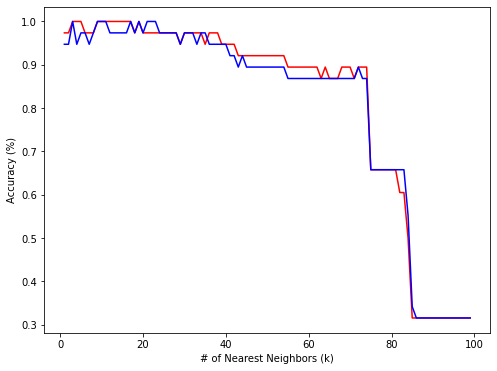

In [188]:
# Obtain accuracy score varying k from 1 to 99

accuracies_euclidean = []
accuracies_manhattan = []

for k in range(1,100):
    y_hat_test_euclidean, y_hat_test_manhattan = knn_predict(X_train, X_test, y_train, y_test, k)
    accuracies_euclidean.append(accuracy_score(y_test, y_hat_test_euclidean))
    accuracies_manhattan.append(accuracy_score(y_test, y_hat_test_manhattan))
accuracies = np.array([accuracies_euclidean,accuracies_manhattan]).T
maxIndex = np.unravel_index(accuracies.argmax(),accuracies.shape)
maxAccuracy = round(accuracies[maxIndex[0],maxIndex[1]]*100,2)
accuracies = pd.DataFrame(data = accuracies, columns=["Eculidean", "Manhattan"], index=range(1,100))
print(accuracies)
print("The Max Acuuracy = ", maxAccuracy,"When K = ", maxIndex[0]+1, "While Using ", end="")
if maxIndex[1] == 0:
  print("Eculidean Distance")
else:
  print("Manhattan Distance")
# Plot the results 

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracies_euclidean , c='r')
ax.plot(range(1,100), accuracies_manhattan,  c='b')
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)');

# **Weighted KNN**

In [189]:
def weighted_knn_predict(X_train, X_test, y_train, y_test, k):
    y_hat_test_euclidean = []
    y_hat_test_manhattan = []

    for test_point in X_test:
        distances = []
        for train_point in X_train:
            distance = euclidean_distance(test_point, train_point)
            distances.append(distance)
        df_dists = pd.DataFrame(data=distances, columns=['dist'], index=df.target.index)
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]
        class0 = []
        class1 = []
        class2 = []
        for i in df_nn.index:
          if(y_train[i]) == 0:
            class0.append(1/df_nn.dist[i])
          elif(y_train[i]) == 1:
            class1.append(1/df_nn.dist[i])
          elif(y_train[i]) == 2:
            class2.append(1/df_nn.dist[i])
        # print(class0, class1, class2)
        class0 = sum(class0)
        class1 = sum(class1)
        class2 = sum(class2)
        pointClass = [class0, class1, class2].index(max(class0, class1, class2))
        y_hat_test_euclidean.append(pointClass)

        distances = []
        for train_point in X_train:
            distance = manhattan_distance(test_point, train_point)
            distances.append(distance)
        df_dists = pd.DataFrame(data=distances, columns=['dist'], index=df.target.index)
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]
        class0 = []
        class1 = []
        class2 = []
        for i in df_nn.index:
          if(y_train[i]) == 0:
            class0.append(1/df_nn.dist[i])
          elif(y_train[i]) == 1:
            class1.append(1/df_nn.dist[i])
          elif(y_train[i]) == 2:
            class2.append(1/df_nn.dist[i])
        # print(class0, class1, class2)
        class0 = sum(class0)
        class1 = sum(class1)
        class2 = sum(class2)
        pointClass = [class0, class1, class2].index(max(class0, class1, class2))
        y_hat_test_manhattan.append(pointClass)
      
    return y_hat_test_euclidean, y_hat_test_manhattan

y_hat_test_euclidean, y_hat_test_manhattan = weighted_knn_predict(X_train, X_test, y_train, y_test, k=5)

print(y_hat_test_euclidean)
print(y_hat_test_manhattan)

[2, 0, 2, 2, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 1, 0, 2, 2, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 1, 2, 1, 0]
[2, 0, 2, 2, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 1, 0, 1, 2, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 1, 2, 1, 0]


In [190]:
print(accuracy_score(y_test, y_hat_test_euclidean))
print(accuracy_score(y_test, y_hat_test_manhattan))

1.0
0.9736842105263158


    Eculidean  Manhattan
1    0.973684   0.947368
2    0.973684   0.947368
3    1.000000   1.000000
4    1.000000   1.000000
5    1.000000   0.973684
..        ...        ...
95   0.973684   0.973684
96   0.973684   0.973684
97   0.973684   0.973684
98   0.973684   0.973684
99   0.973684   0.973684

[99 rows x 2 columns]
The Max Acuuracy =  100.0 When K =  3 While Using Eculidean Distance


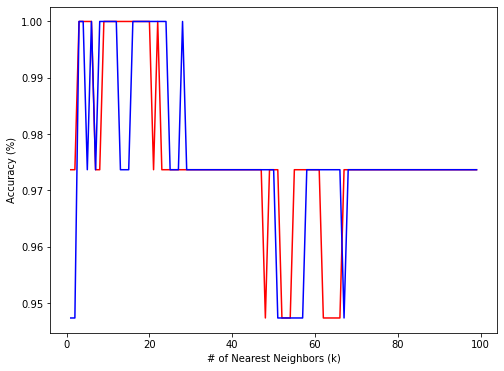

In [191]:
# Obtain accuracy score varying k from 1 to 99

accuracies_euclidean = []
accuracies_manhattan = []

for k in range(1,100):
    y_hat_test_euclidean, y_hat_test_manhattan = weighted_knn_predict(X_train, X_test, y_train, y_test, k)
    accuracies_euclidean.append(accuracy_score(y_test, y_hat_test_euclidean))
    accuracies_manhattan.append(accuracy_score(y_test, y_hat_test_manhattan))
accuracies = np.array([accuracies_euclidean,accuracies_manhattan]).T
maxIndex = np.unravel_index(accuracies.argmax(),accuracies.shape)
maxAccuracy = round(accuracies[maxIndex[0],maxIndex[1]]*100,2)
accuracies = pd.DataFrame(data = accuracies, columns=["Eculidean", "Manhattan"], index=range(1,100))
print(accuracies)
print("The Max Acuuracy = ", maxAccuracy,"When K = ", maxIndex[0]+1, "While Using ", end="")
if maxIndex[1] == 0:
  print("Eculidean Distance")
else:
  print("Manhattan Distance")
# Plot the results 

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracies_euclidean , c='r')
ax.plot(range(1,100), accuracies_manhattan,  c='b')
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)');